In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import os
from diabetes_data_code.process_data import (
    all_cols_to_int,
    rename_diabetes_column,
    remove_unimportant_cols,
)
from diabetes_data_code.visualizations import plot_data_summary_by_col
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

[Diabetes Dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

In [26]:
data = pd.read_csv(os.path.join("data", "raw", "diabetes_binary_health_indicators_BRFSS2015.csv"))

# EDA

## The Basics

In [27]:
df_processed = all_cols_to_int(data)
df_processed = rename_diabetes_column(df_processed)

checking nulls

In [28]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

## Summaries

Checking unique values and summary statistics. More intuition on the data is gained when I visualize this summary.

In [29]:
to_describe_at_once = 5
cols = data.columns
i=0
num_cols = len(cols)
while i*to_describe_at_once <= num_cols:
    upper_col_num_bound = min(num_cols, (i+1)*to_describe_at_once)
    cols_this_iter = cols[i*to_describe_at_once:upper_col_num_bound]
    display(data[cols_this_iter].describe())
    for col in cols_this_iter:
        print(f"{col}'s unique values: {sorted(data[col].unique())}")
    i = i+1

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364
std,0.346294,0.494934,0.494210,0.189571,6.608694
min,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000


Diabetes_binary's unique values: [0, 1]
HighBP's unique values: [0, 1]
HighChol's unique values: [0, 1]
CholCheck's unique values: [0, 1]
BMI's unique values: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 98]


,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.443169,0.040571,0.094186,0.756544,0.634256
std,0.496761,0.197294,0.292087,0.429169,0.481639
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Smoker's unique values: [0, 1]
Stroke's unique values: [0, 1]
HeartDiseaseorAttack's unique values: [0, 1]
PhysActivity's unique values: [0, 1]
Fruits's unique values: [0, 1]


,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.811420,0.056197,0.951053,0.084177,2.511392
std,0.391175,0.230302,0.215759,0.277654,1.068477
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000


Veggies's unique values: [0, 1]
HvyAlcoholConsump's unique values: [0, 1]
AnyHealthcare's unique values: [0, 1]
NoDocbcCost's unique values: [0, 1]
GenHlth's unique values: [1, 2, 3, 4, 5]


,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,3.184772,4.242081,0.168224,0.440342,8.032119
std,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000
75%,2.000000,3.000000,0.000000,1.000000,10.000000
max,30.000000,30.000000,1.000000,1.000000,13.000000


MentHlth's unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
PhysHlth's unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
DiffWalk's unique values: [0, 1]
Sex's unique values: [0, 1]
Age's unique values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


,Education,Income
count,253680.000000,253680.000000
mean,5.050434,6.053875
std,0.985774,2.071148
min,1.000000,1.000000
25%,4.000000,5.000000
50%,5.000000,7.000000
75%,6.000000,8.000000
max,6.000000,8.000000


Education's unique values: [1, 2, 3, 4, 5, 6]
Income's unique values: [1, 2, 3, 4, 5, 6, 7, 8]


## Visualizing the summaries

For each column I create two visualizations. A visualization that shows the number of observations for each value of the column, and a visualization showing for each value achieved in the individual column, what percent has diabetes. The visual is different depending if the column is binary valued or not

**Binary Valued**

For example, in the visualization for the first column (HighBP) directly below this cell:
* In the first visualization we see that there are many people that have both 0 and 1 for this column in the data.
* In the second visualization we see that 6 percent of people with 0 HighBP have diabetes, while 24% with HighBP 1.

**Not Binary Valued**

In the case that the column is not binary, such as BMI, I display this infomation with scatterplots. Continuing with the example of BMI, we see 
* In the first visualization that most of the data have a BMI between 20 and 40, and * That there is a general increasing trend of fraction with diabetes and BMI, as expected.

The following columns look most important for the model based on the visualizations below:
* HighBP
* HighChol
* BMI
* Stroke
* HeartDiseaseorAttack
* PhysActivity
* GenHlth
* DiffWalk
* Age
* Education
* Income

The following columns look like they may be important as well, but don't look quite as important as the above
* Smoker
* Fruits
* Veggies
* NoDocbcCost
* MntHlth
* PhysHlth
* Sex

The following columns do not appear to be significant: 
* AnyHealthCare

The following columns seem a bit counter intuitive:
* HvyAlcoholConsump - I would expect if someone was a heavy drinker, that they would be more likely to have diabetes. However, the opposite is true according to these data.

Finally, it looks like there are very few samples in the CholCheck=0 col, so I'll drop that

--------------------------------------------
Generic information about column HighBP
--------------------------------------------


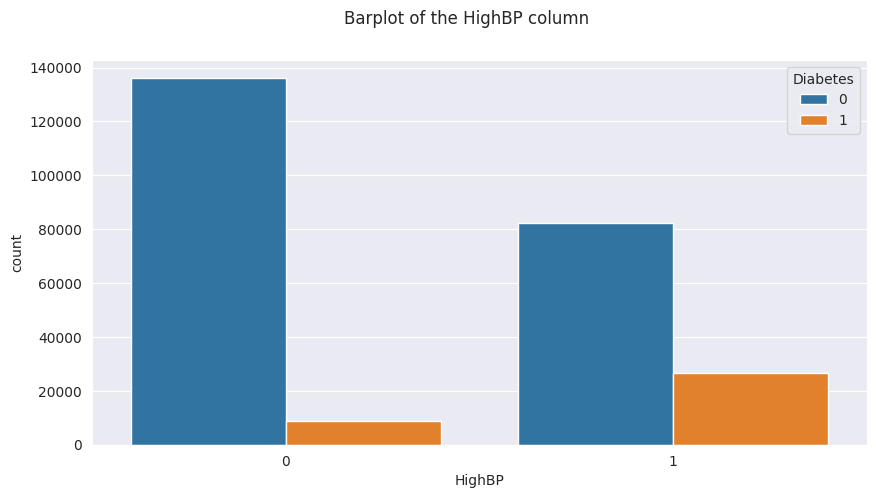

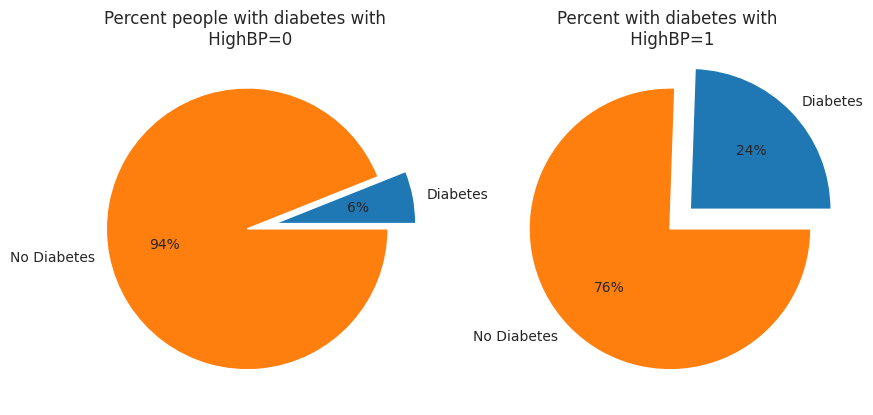

--------------------------------------------
Generic information about column HighChol
--------------------------------------------


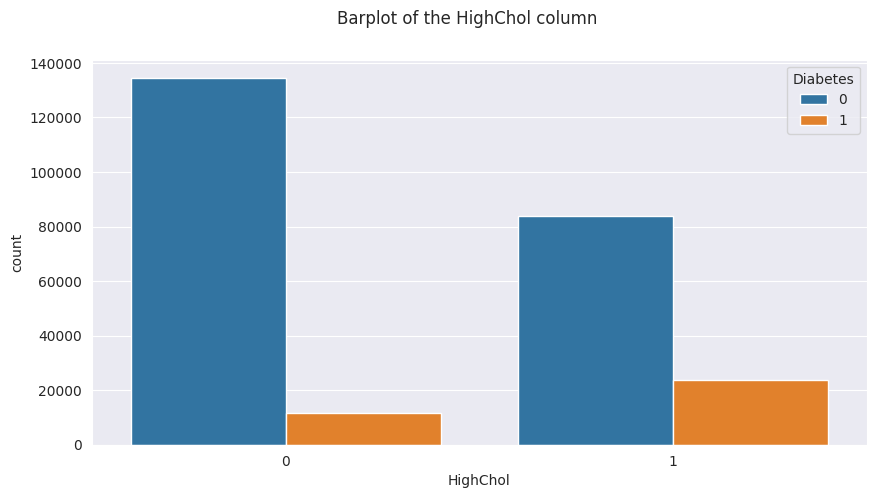

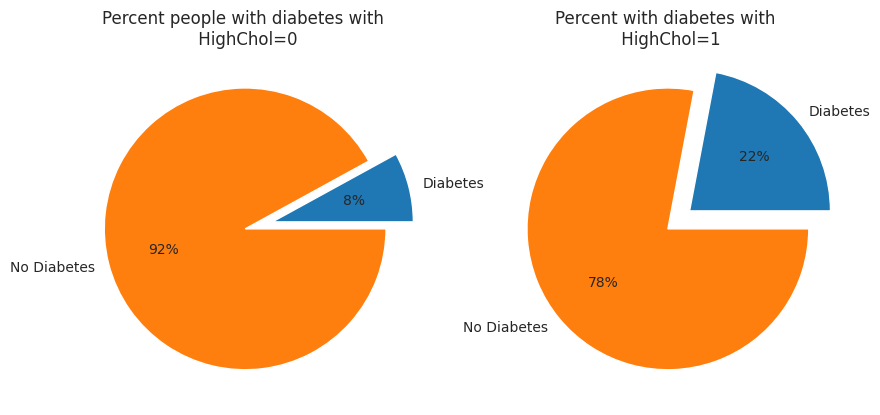

--------------------------------------------
Generic information about column CholCheck
--------------------------------------------


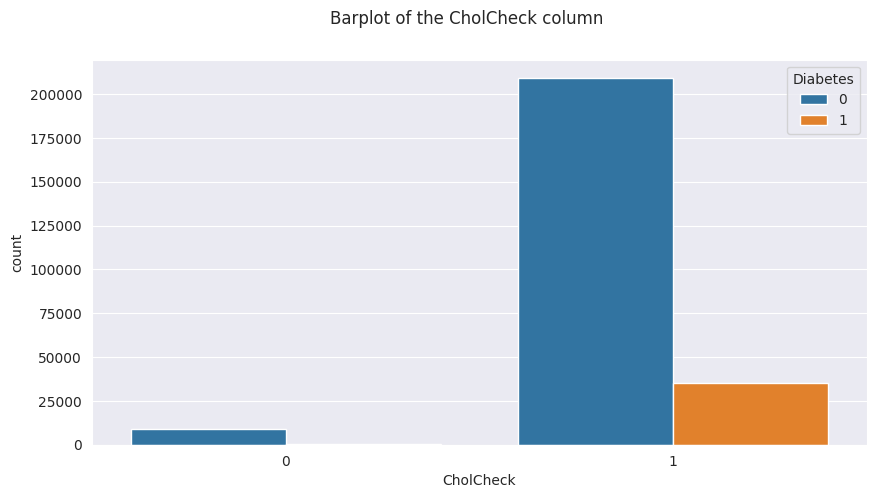

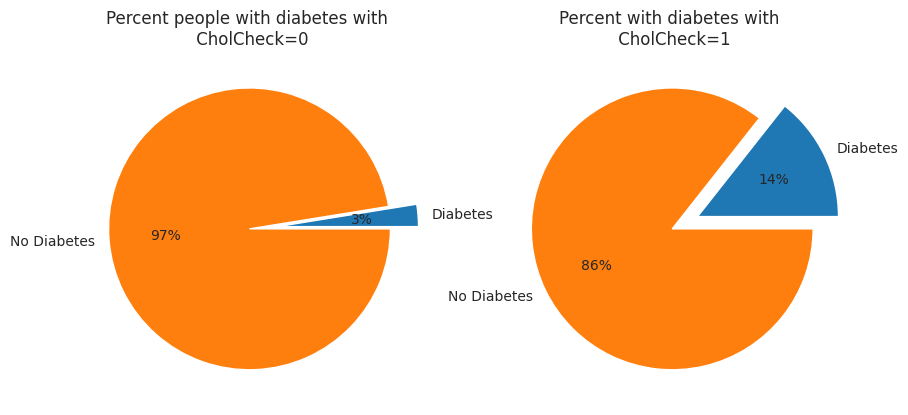

--------------------------------------------
Generic information about column BMI
--------------------------------------------


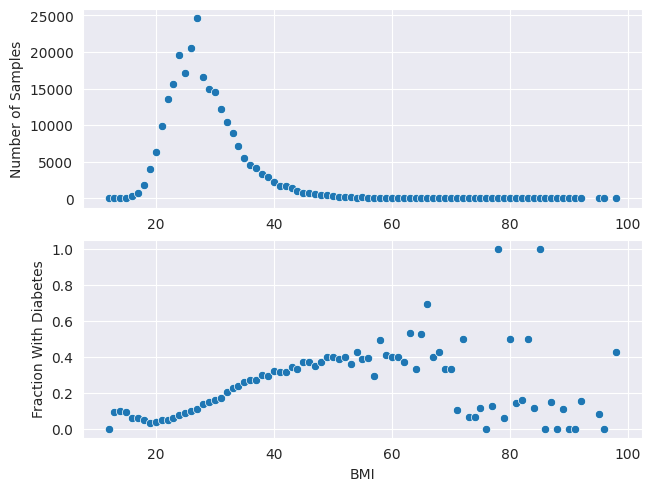

--------------------------------------------
Generic information about column Smoker
--------------------------------------------


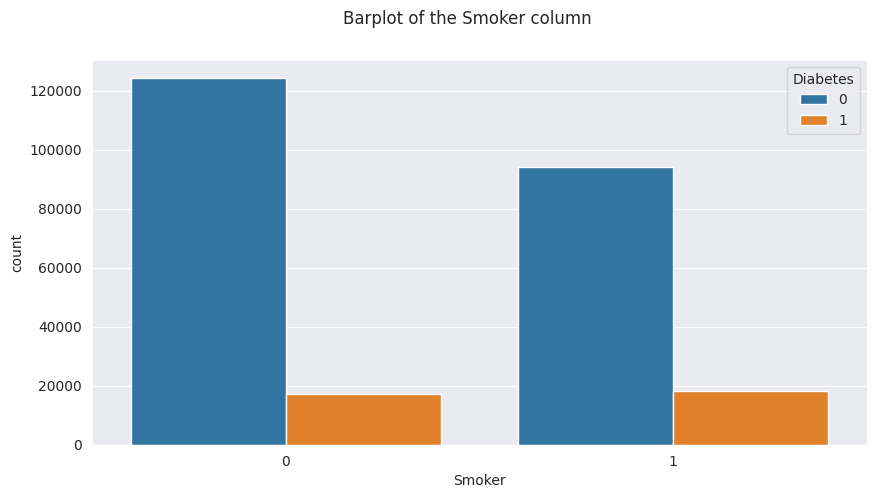

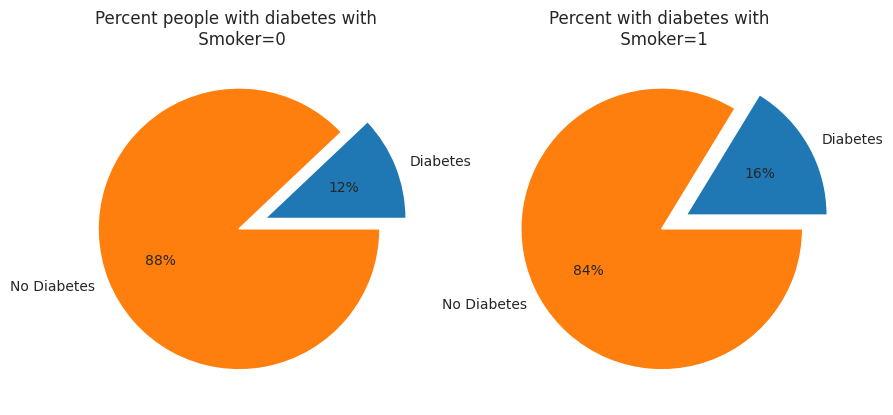

--------------------------------------------
Generic information about column Stroke
--------------------------------------------


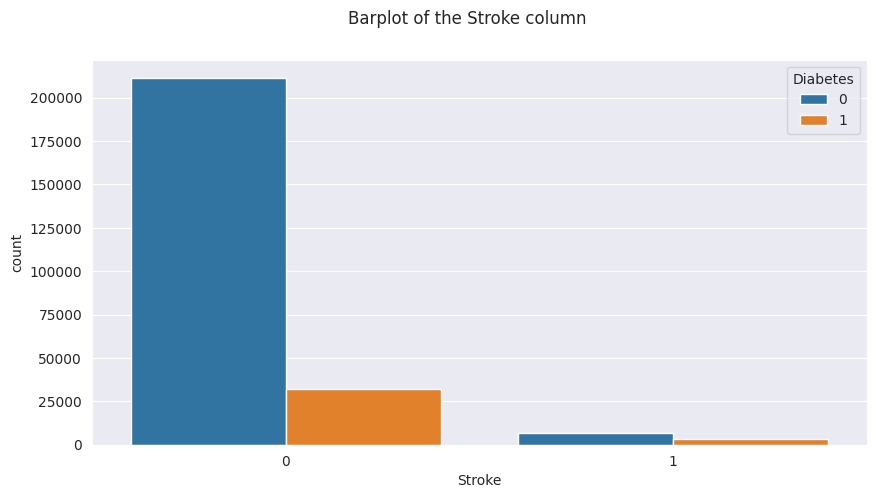

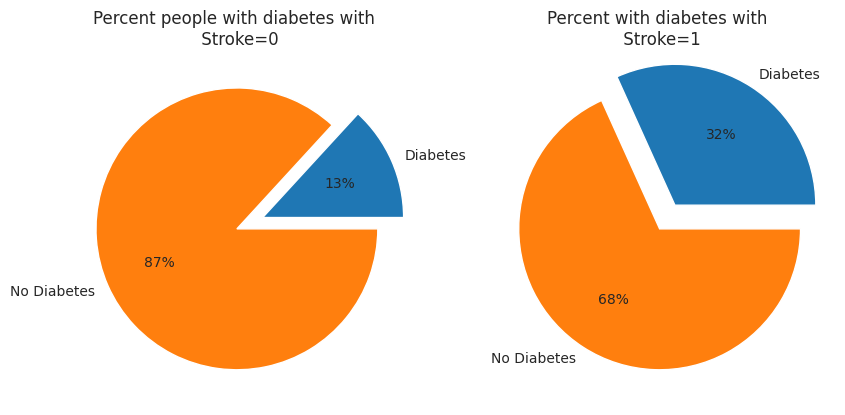

--------------------------------------------
Generic information about column HeartDiseaseorAttack
--------------------------------------------


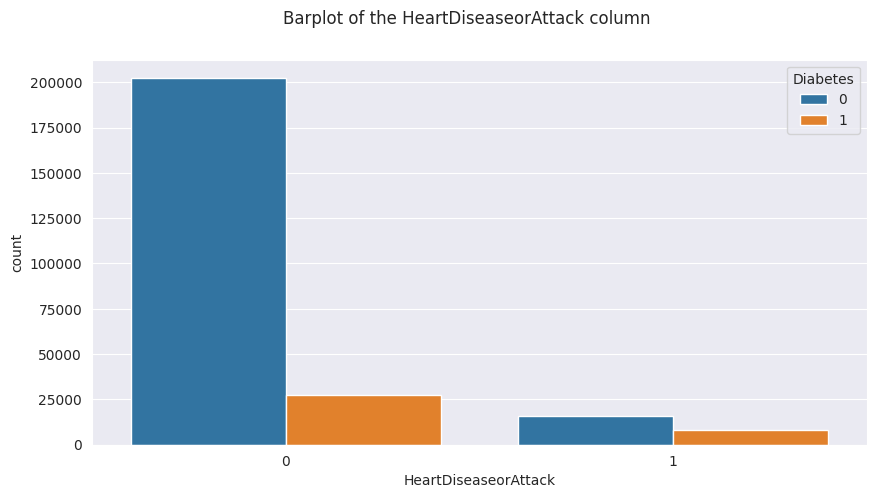

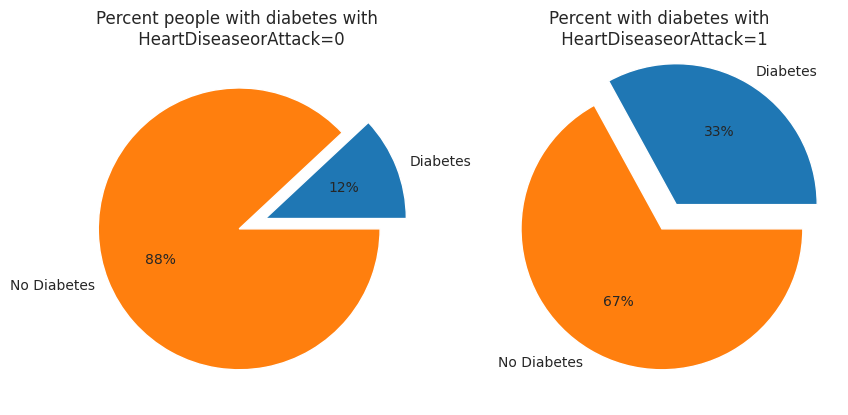

--------------------------------------------
Generic information about column PhysActivity
--------------------------------------------


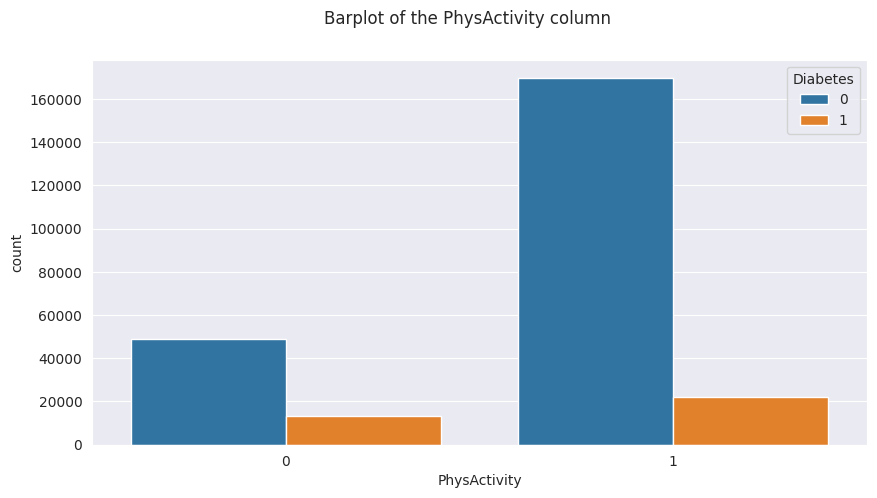

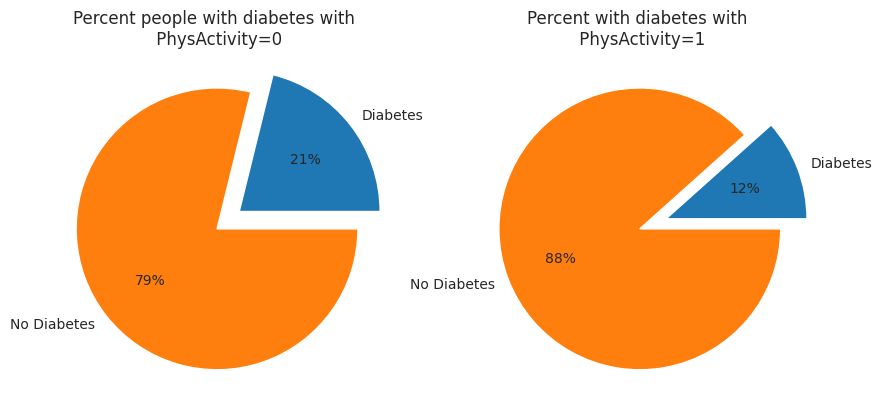

--------------------------------------------
Generic information about column Fruits
--------------------------------------------


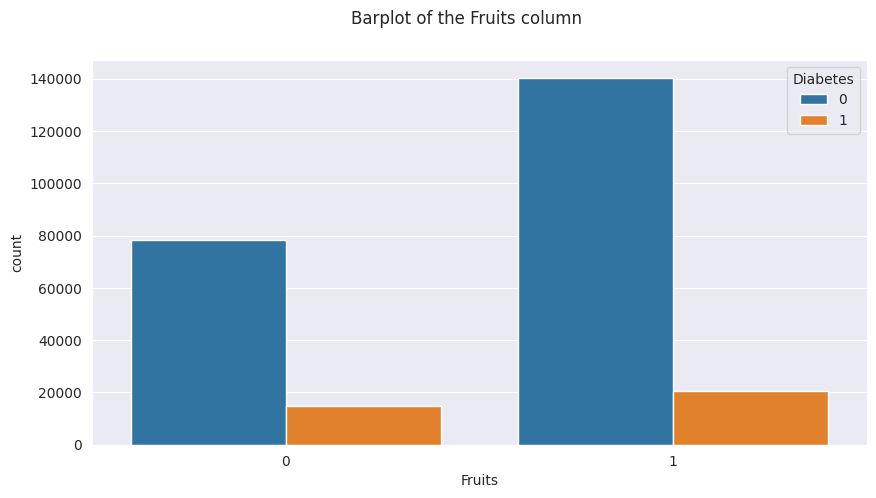

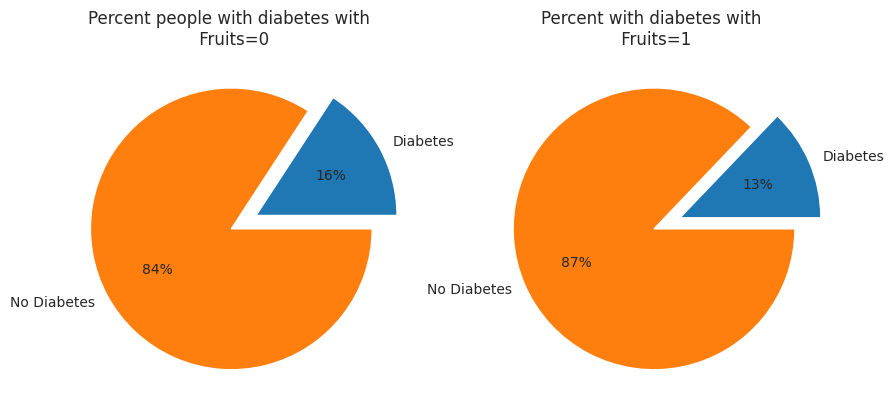

--------------------------------------------
Generic information about column Veggies
--------------------------------------------


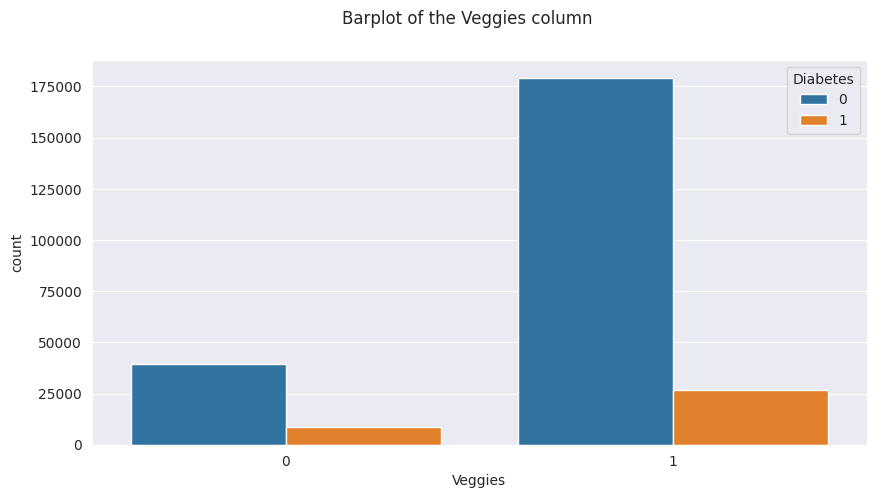

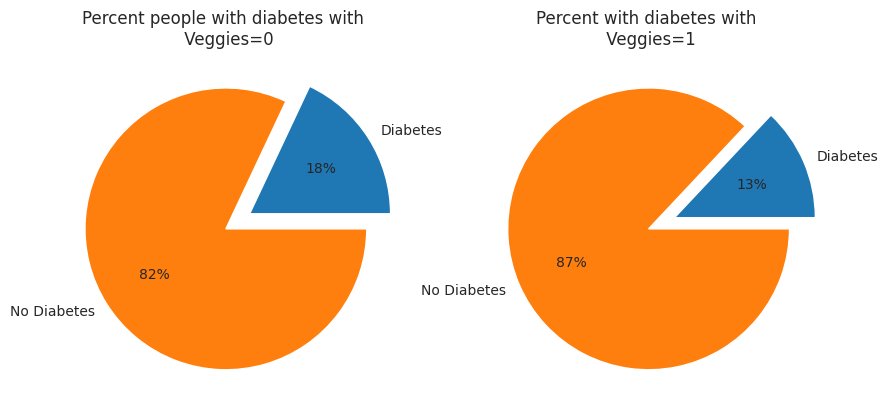

--------------------------------------------
Generic information about column HvyAlcoholConsump
--------------------------------------------


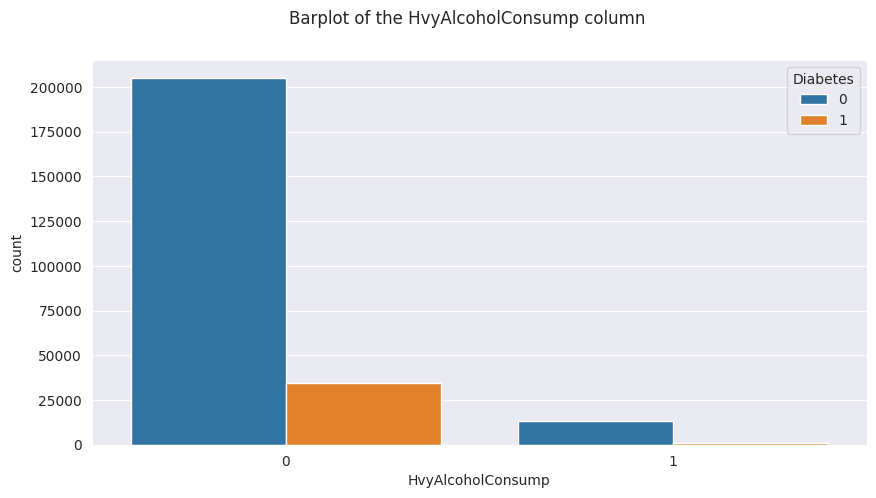

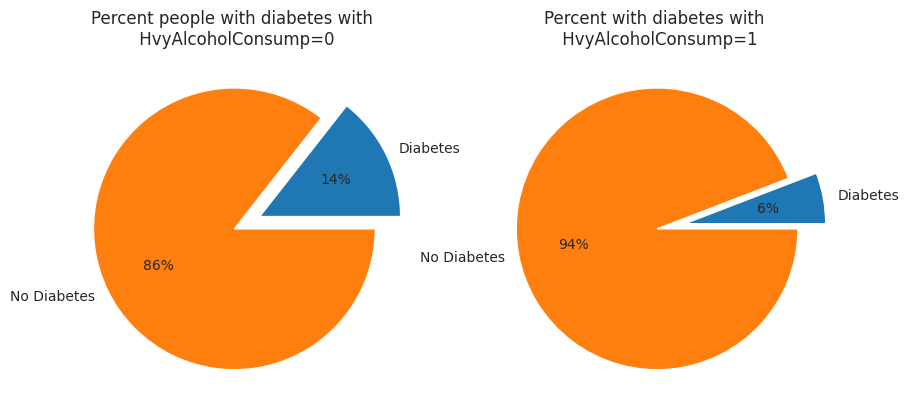

--------------------------------------------
Generic information about column AnyHealthcare
--------------------------------------------


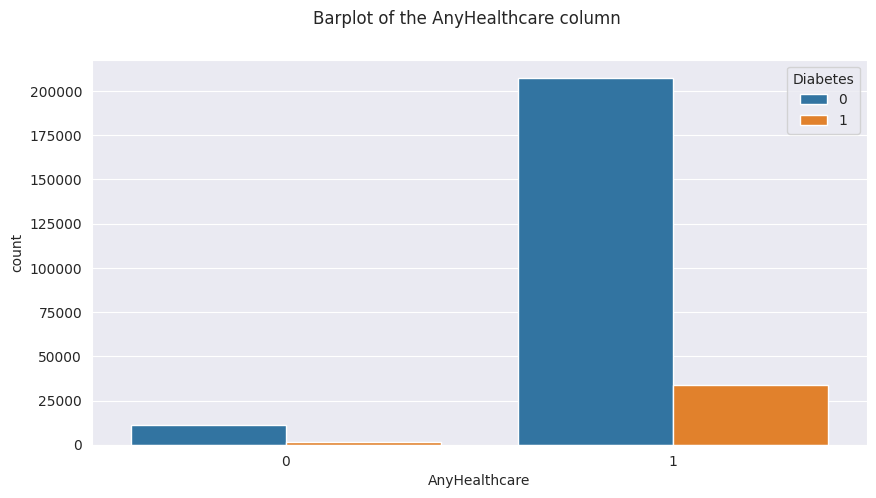

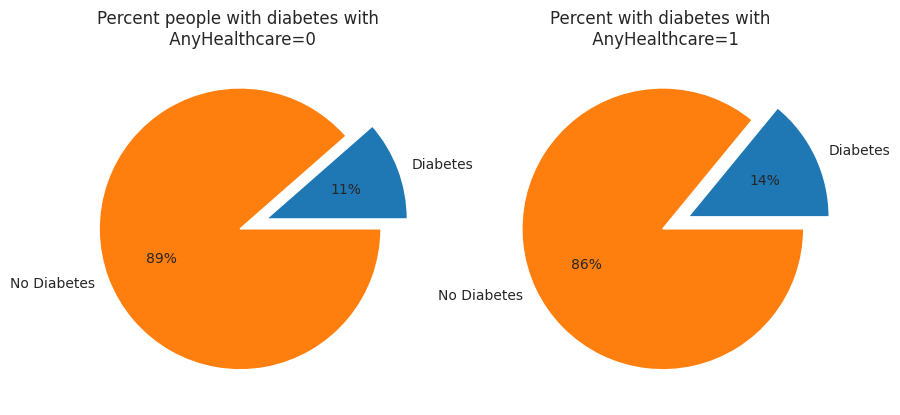

--------------------------------------------
Generic information about column NoDocbcCost
--------------------------------------------


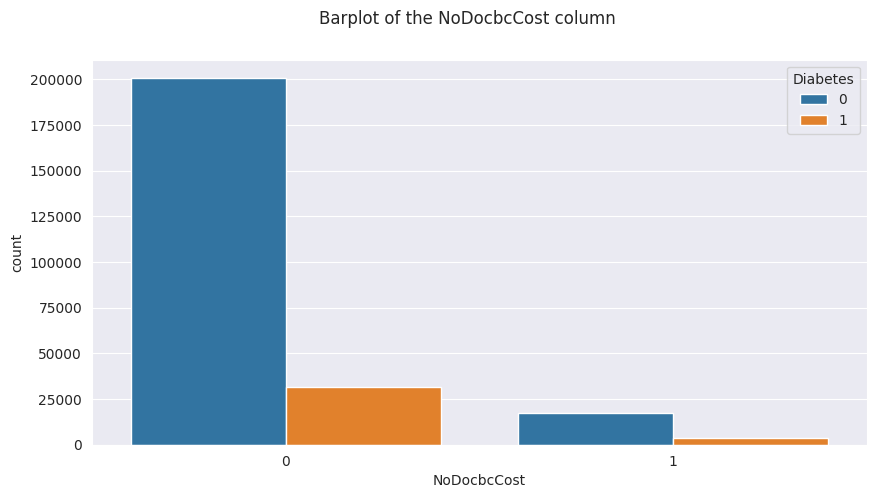

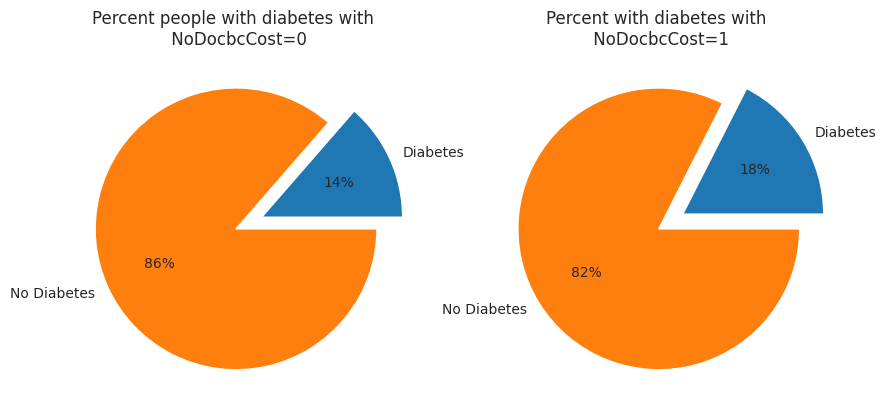

--------------------------------------------
Generic information about column GenHlth
--------------------------------------------


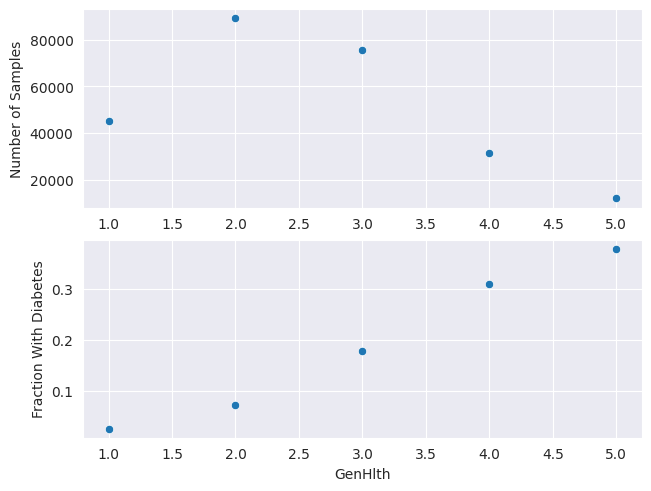

--------------------------------------------
Generic information about column MentHlth
--------------------------------------------


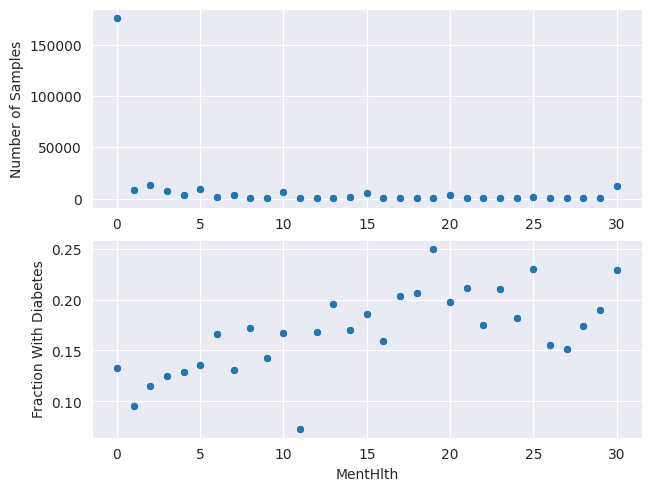

--------------------------------------------
Generic information about column PhysHlth
--------------------------------------------


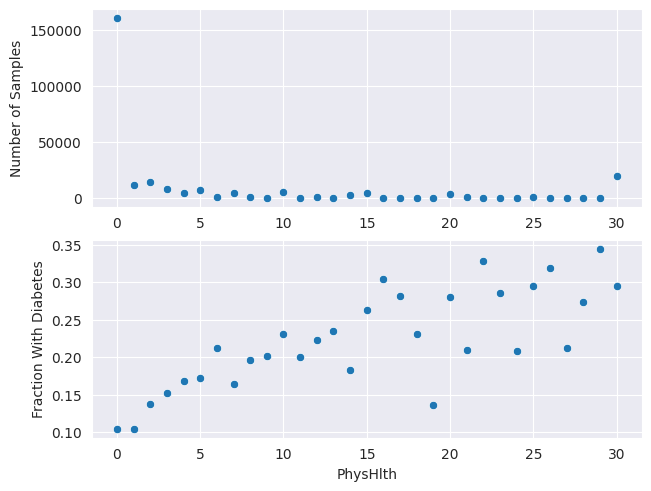

--------------------------------------------
Generic information about column DiffWalk
--------------------------------------------


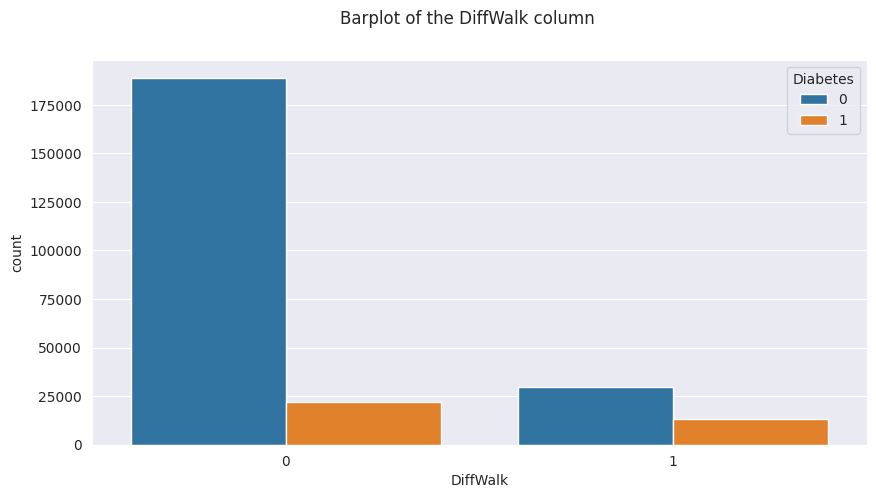

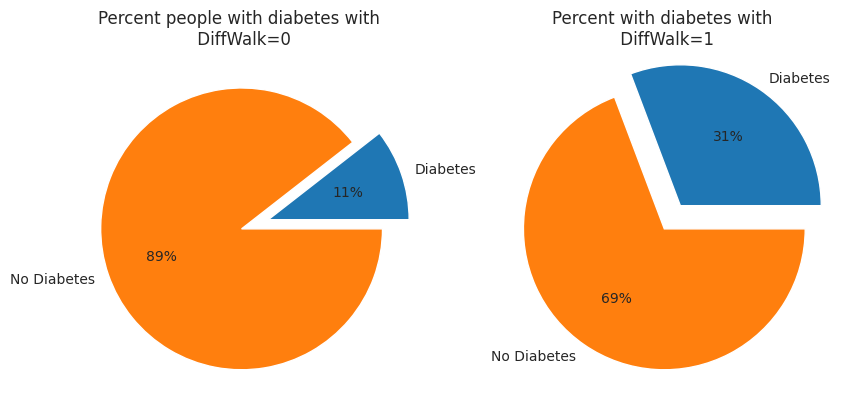

--------------------------------------------
Generic information about column Sex
--------------------------------------------


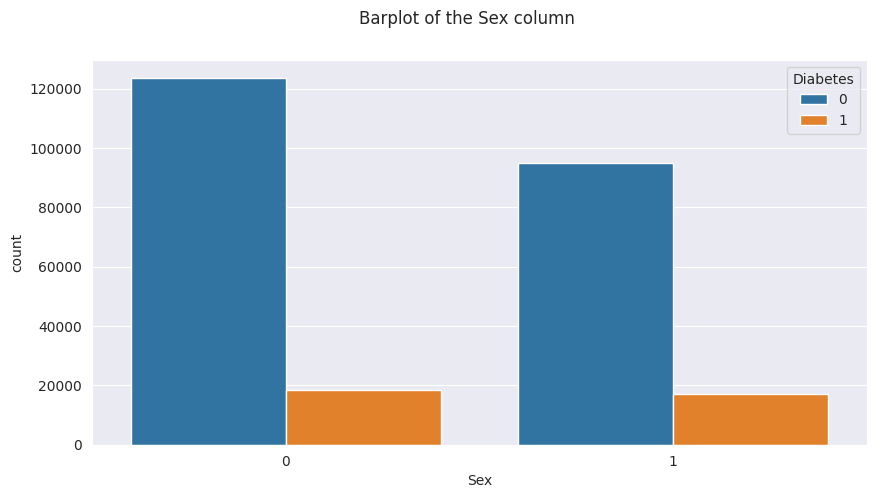

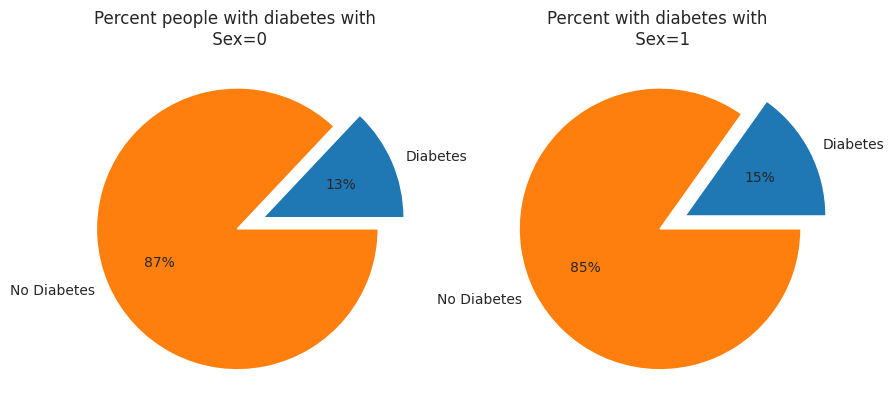

--------------------------------------------
Generic information about column Age
--------------------------------------------


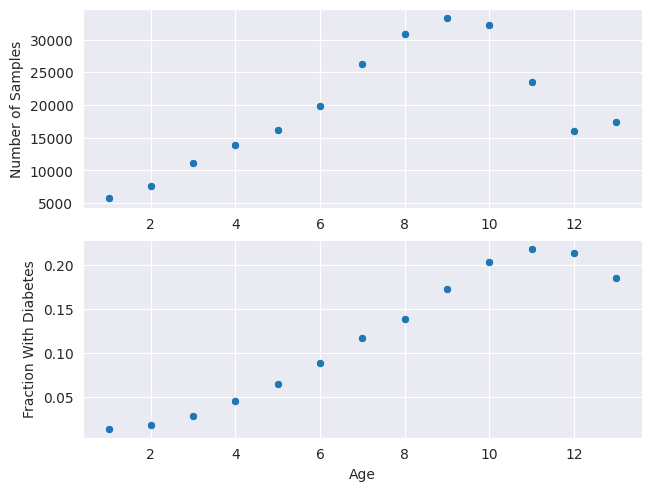

--------------------------------------------
Generic information about column Education
--------------------------------------------


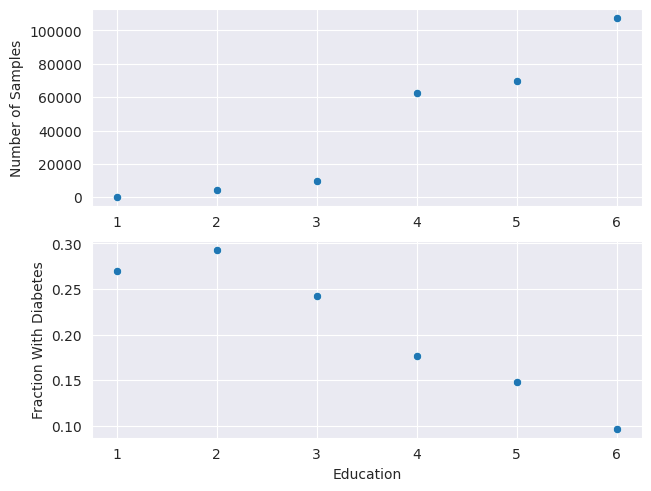

--------------------------------------------
Generic information about column Income
--------------------------------------------


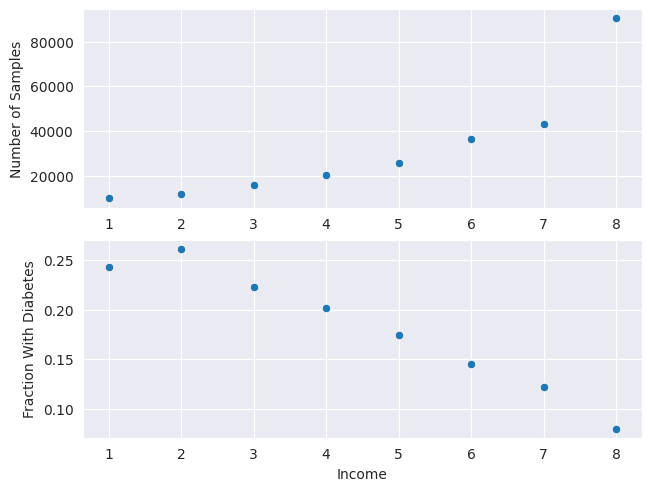

In [30]:
plot_data_summary_by_col(df_processed)

Based on the above, I'm going to remove AnyHealthCare and HvyAlcoholConsump

In [31]:
df_processed = remove_unimportant_cols(df_processed)

## Upsampling

In [32]:
df_processed["Diabetes"].describe()

count    253680.000000
mean          0.139333
std           0.346294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes, dtype: float64

One of the issues that will affect the training of the model is the fact that the data are imbalanced. The above cell shows that about 14% of the samples have diabetes. Training an XGBoost model on these imbalanced data can cause the model to ignore the errors in the minority class. 

As a simple example, let's exaggerate and say that there were 100,000 diabates negative samples, and 10 positive samples. The binary cross entropy metric will have very little contribution from the positive samples. 

Furthermore, in a world of predicting a relatively uncommon disease, this is dangerous. We would much rather create a classifier that predicted more false positives (better recall) than false negatives (better precision)

We can tackle this in a couple different ways. What follows is a technique for upsampling the minority class called SMOTE. As a summary, I will

* Split the data (Train Test).
* Take the training data and create cross-validation sets for hyperparameter tuning when it comes time to model build.
* For each fold in the cross validation set, I will upsample the training fold, but not the validation fold. This way I'm optimizing my hyperparameters based on metrics recorded on the original data, not the artificially upsampled data from SMOTE
* After the best hyperparameters have been found, I'll need to train the model on the entirety of the training data, so I'll upsample all of the training data. Then, the model can be checked on the test set, which is not upsampled.

In essence, we upsample anything we train on, whether it be in cross validation for hyperparameters or in creating the end model, but we record metrics on non-upsampled data.

In [33]:
data_params_file = "data_params.yaml"
with open(data_params_file, "r") as f:
    data_params = yaml.safe_load(f)

## Train test split the data

In [34]:
data_params

{'xgboost_training': {'training_percentage': 0.8,
  'num_cross_validation_sets': 5}}

In [35]:
df_train, df_test = train_test_split(df_processed, test_size = data_params["xgboost_training"]["training_percentage"], random_state=42)

## Create cross validiation data

In [36]:
features = [col for col in df_train.columns if col!="Diabetes"]
target = "Diabetes"

In [37]:
X_train = df_train[features]
y_train = df_train[target]

In [38]:
n_folds = data_params["xgboost_training"]["num_cross_validation_sets"]

In [39]:
kf = KFold(n_splits = n_folds, shuffle=True, random_state=42)
split = kf.split(df_train)

In [40]:
X_train_cv_list: list[pd.DataFrame] = []
y_train_cv_list: list[pd.Series] = []

X_val_cv_list: list[pd.DataFrame] = []
y_val_cv_list: list[pd.Series] = []

In [41]:
for _, (train_index, test_index) in enumerate(split):
    X_train_cv, y_train_cv = (
        X_train.iloc[train_index],
        y_train.iloc[train_index],
    )
    X_val_cv, y_val_cv = X_train.iloc[test_index], y_train.iloc[test_index]
    X_train_cv_list.append(X_train_cv)
    y_train_cv_list.append(y_train_cv)

    X_val_cv_list.append(X_val_cv)
    y_val_cv_list.append(y_val_cv)

## Upsample with SMOTE

In [42]:
smt = SMOTE(random_state = 42, k_neighbors=3)
X_train_cv_list_upsample: list[pd.DataFrame] = []
y_train_cv_list_upsample: list[pd.Series] = []
for X_train_cv, y_train_cv in zip(X_train_cv_list, y_train_cv_list):
    X_train_cv_upsample, y_train_cv_upsample = smt.fit_resample(
        X_train_cv, y_train_cv
    )
    X_train_cv_list_upsample.append(X_train_cv_upsample)
    y_train_cv_list_upsample.append(y_train_cv_upsample)
X_train_upsample, y_train_upsample = smt.fit_resample(X_train, y_train)

In [43]:
y_train.describe()

count    50736.000000
mean         0.139053
std          0.346005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diabetes, dtype: float64

In [44]:
y_train_upsample.describe()

count    87362.000000
mean         0.500000
std          0.500003
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Diabetes, dtype: float64

In [45]:
df_train_upsampled = pd.concat([X_train_upsample, y_train_upsample], axis=1)
df_train_upsampled.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0,1,84,1,0,0,1,1,1,0,3,4,1,0,0,2,6,5,0
1,0,0,29,0,0,0,1,0,1,1,2,0,1,0,1,7,6,8,0
2,0,1,30,0,0,0,1,1,1,0,2,0,0,0,1,7,5,7,1
3,1,0,44,1,0,0,1,1,0,0,3,0,0,0,0,10,6,7,1
4,1,0,25,0,0,0,1,0,1,0,2,0,0,0,0,7,6,8,0


When we upsample, the general way that it works is that it finds a few samples that have the minority class (Diabetes, in this case) and then it creates new samples that are similar to those three samples with the minority class. Check out the SMOTE documentation if you'd like to see more. 

When I run the visualizations that I ran beforehand, we can see the effect. For example, for the high blood pressure column, we see now that there are almost twice as many people with diabetes than without for HighBP=1. This makes sense, as if we are going to make the dataset balanced, more people with high blood pressure should have Diabetes.

--------------------------------------------
Generic information about column HighBP
--------------------------------------------


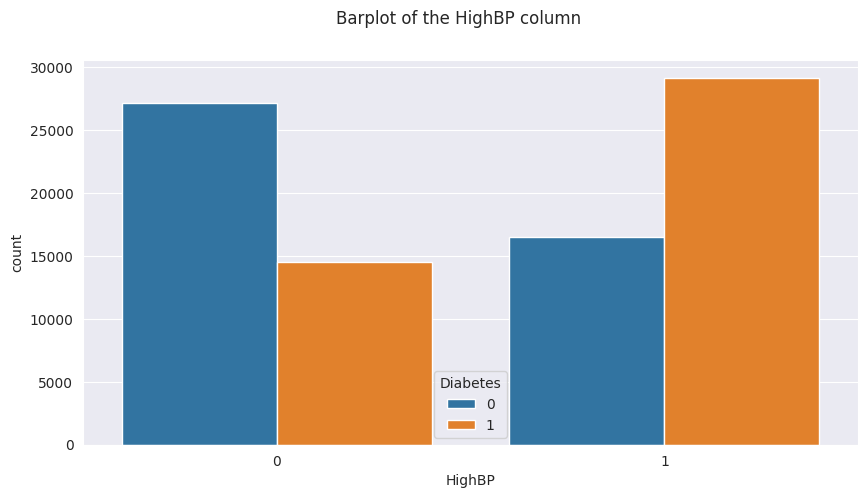

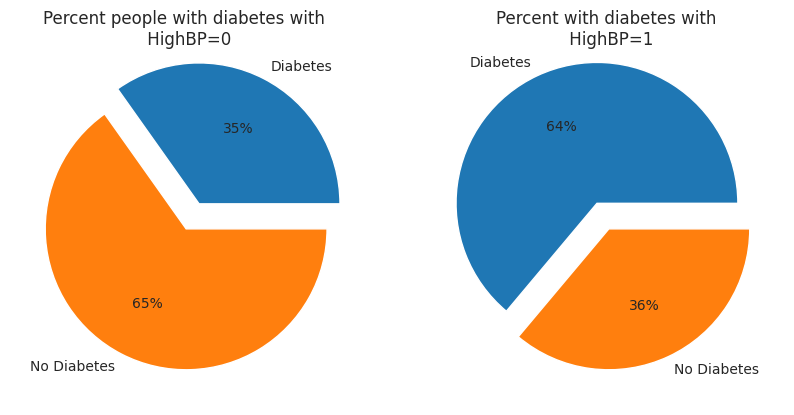

--------------------------------------------
Generic information about column HighChol
--------------------------------------------


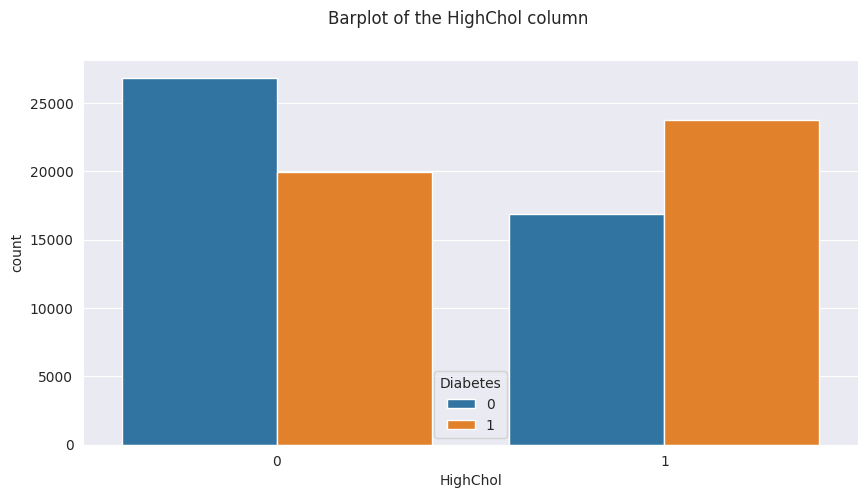

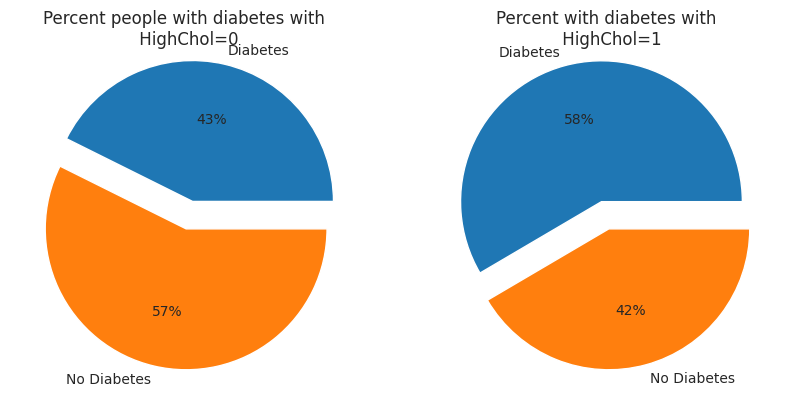

--------------------------------------------
Generic information about column BMI
--------------------------------------------


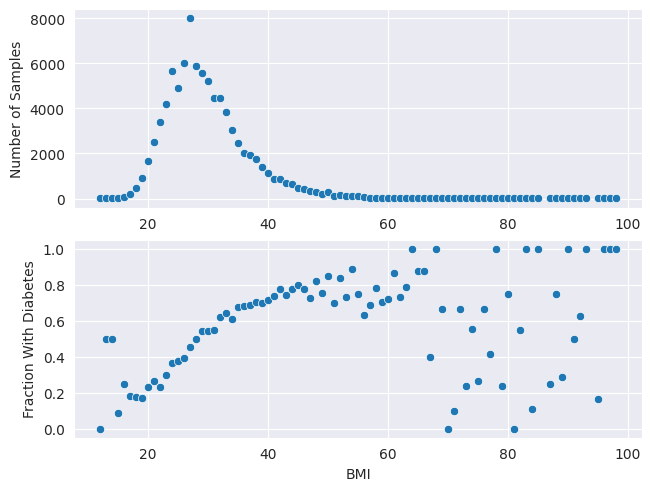

--------------------------------------------
Generic information about column Smoker
--------------------------------------------


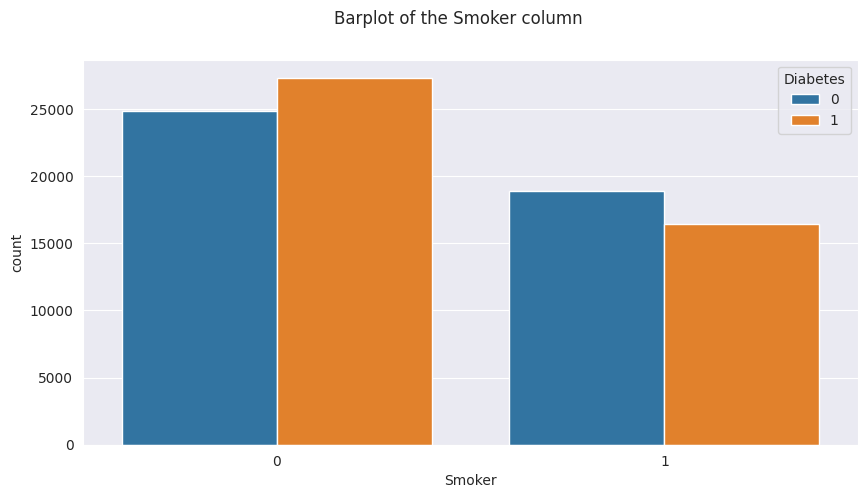

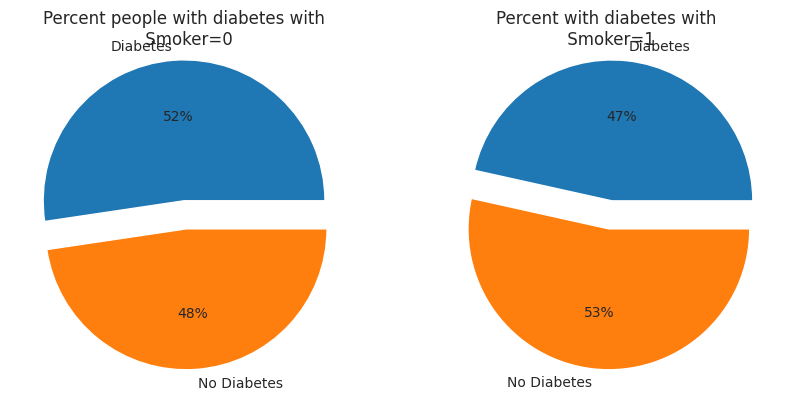

--------------------------------------------
Generic information about column Stroke
--------------------------------------------


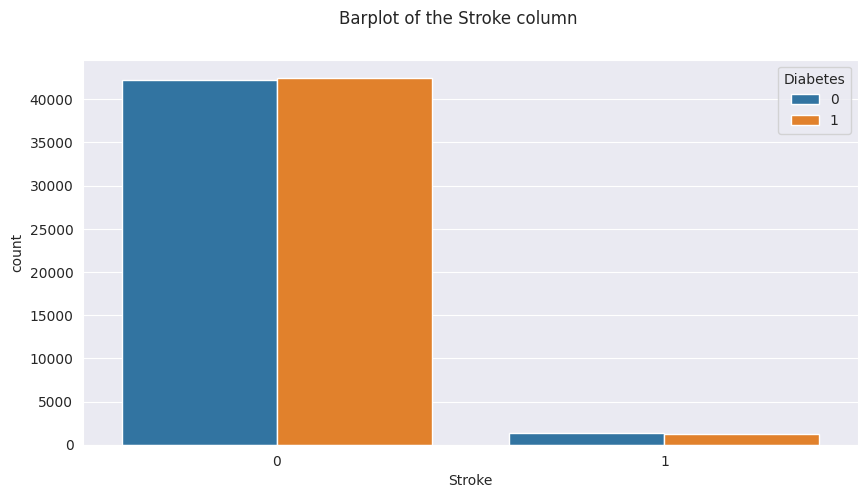

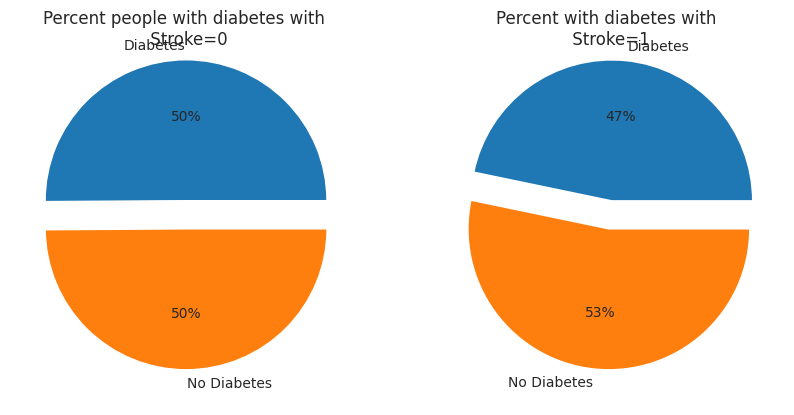

--------------------------------------------
Generic information about column HeartDiseaseorAttack
--------------------------------------------


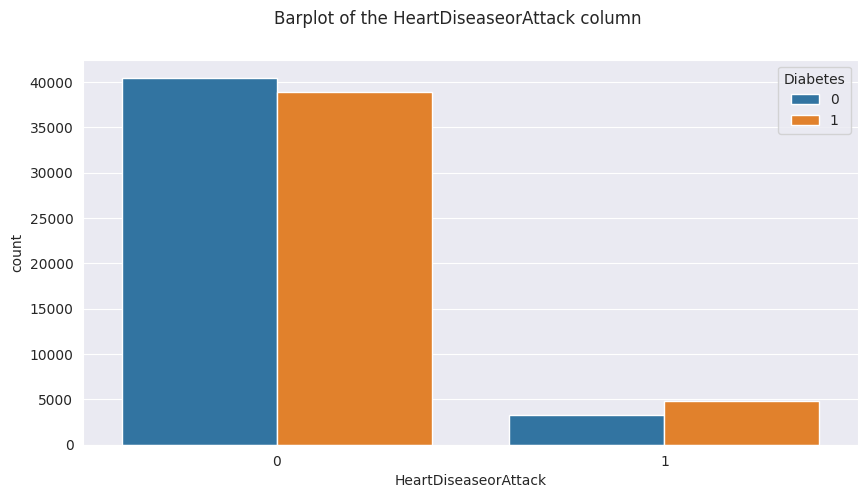

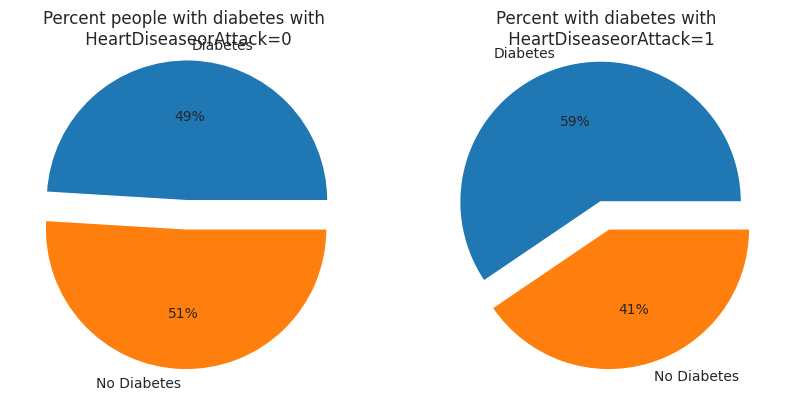

--------------------------------------------
Generic information about column PhysActivity
--------------------------------------------


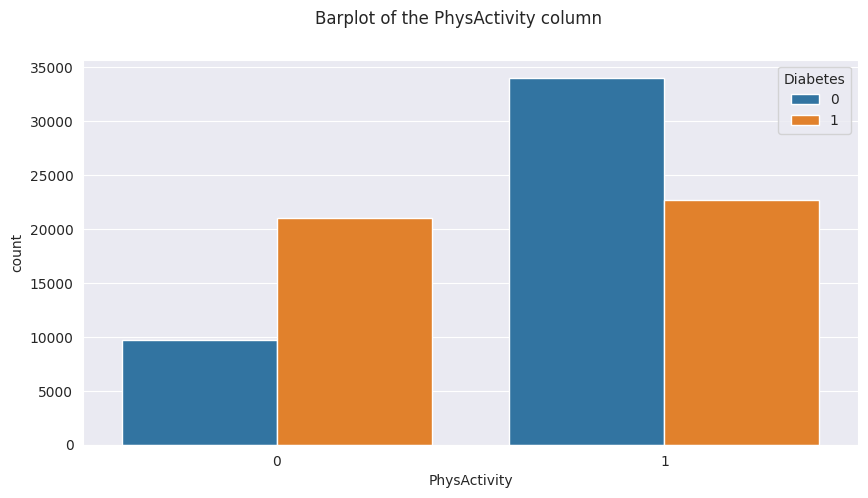

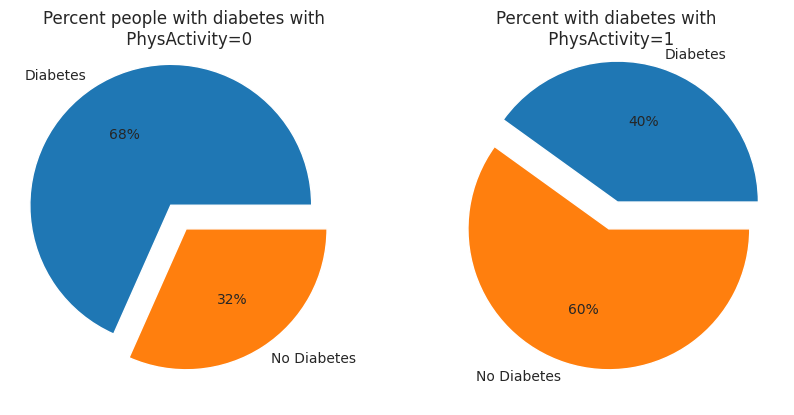

--------------------------------------------
Generic information about column Fruits
--------------------------------------------


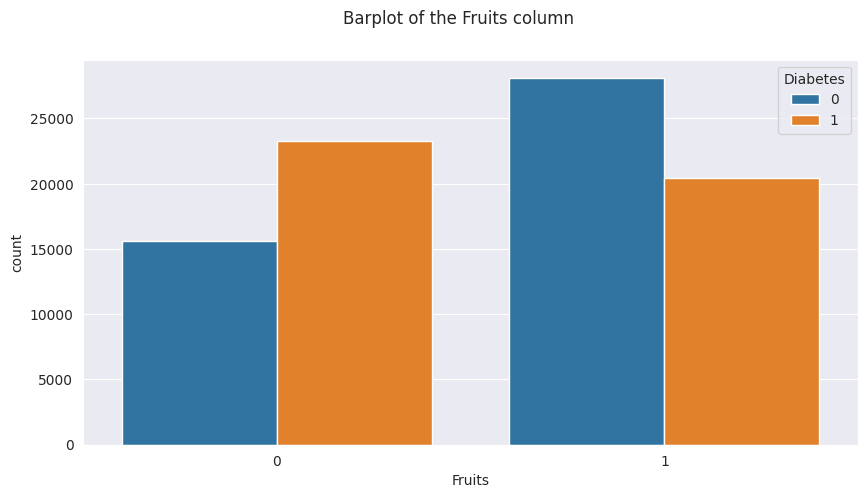

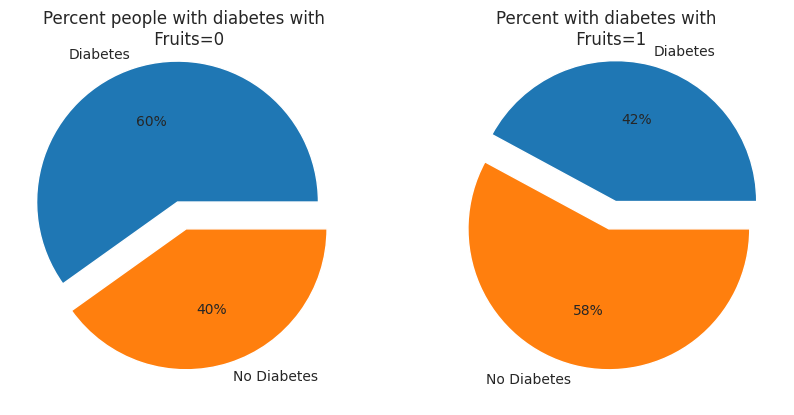

--------------------------------------------
Generic information about column Veggies
--------------------------------------------


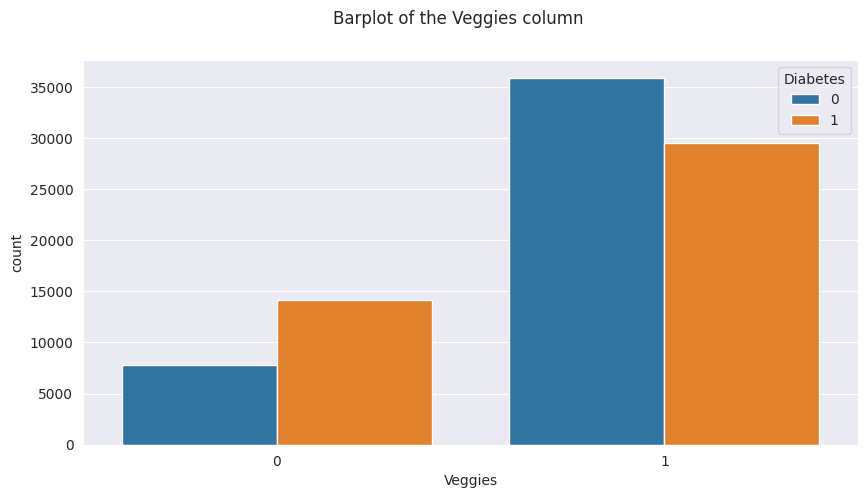

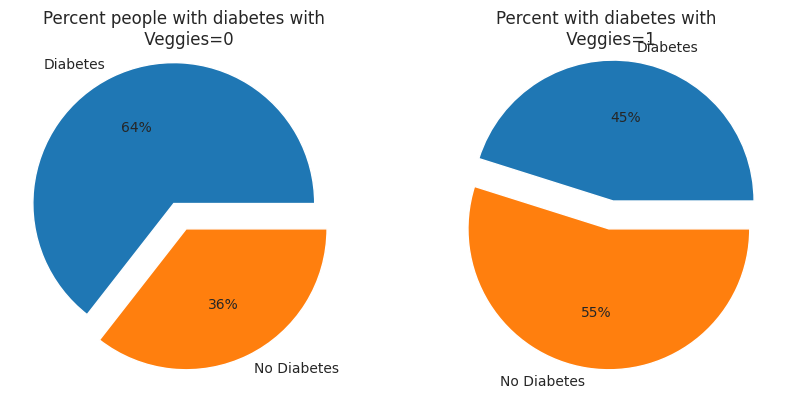

--------------------------------------------
Generic information about column NoDocbcCost
--------------------------------------------


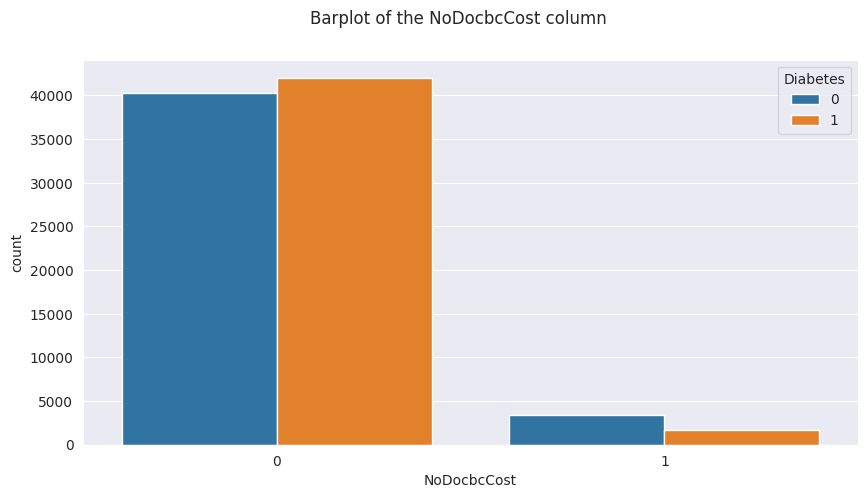

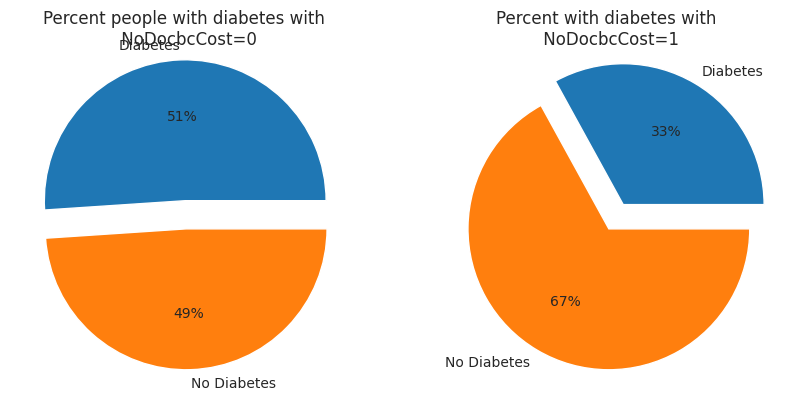

--------------------------------------------
Generic information about column GenHlth
--------------------------------------------


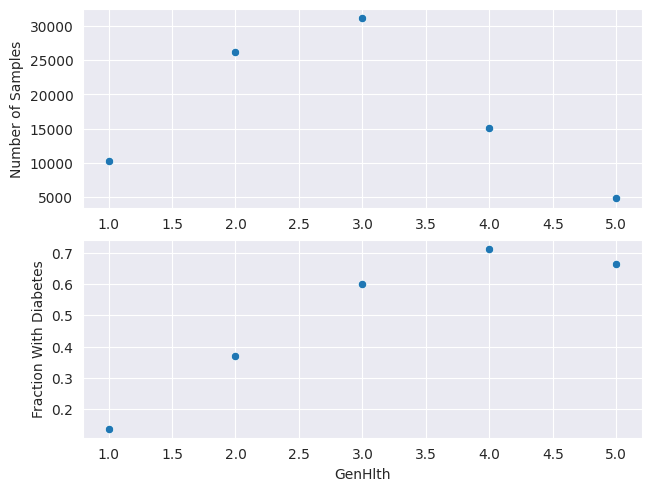

--------------------------------------------
Generic information about column MentHlth
--------------------------------------------


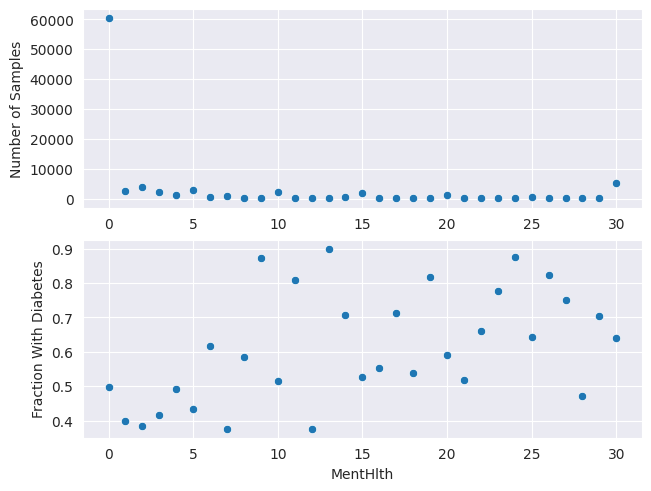

--------------------------------------------
Generic information about column PhysHlth
--------------------------------------------


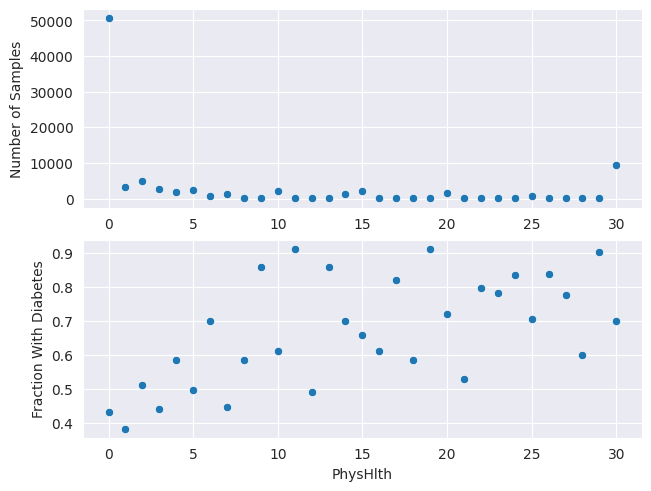

--------------------------------------------
Generic information about column DiffWalk
--------------------------------------------


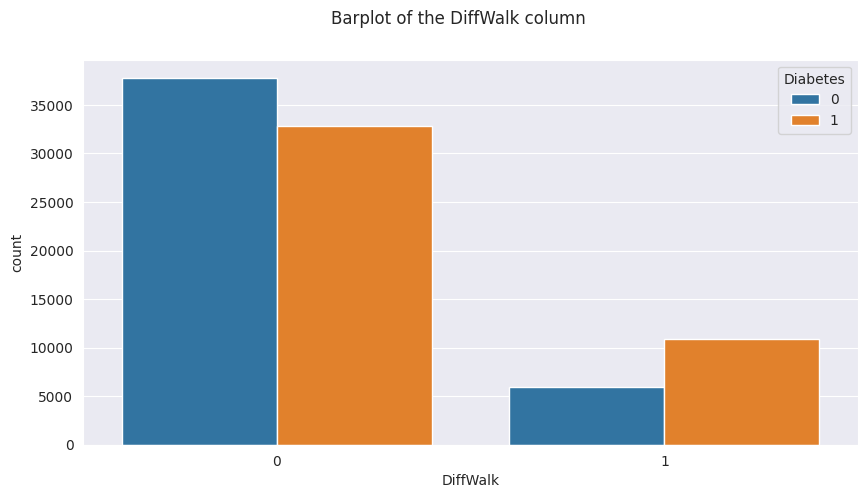

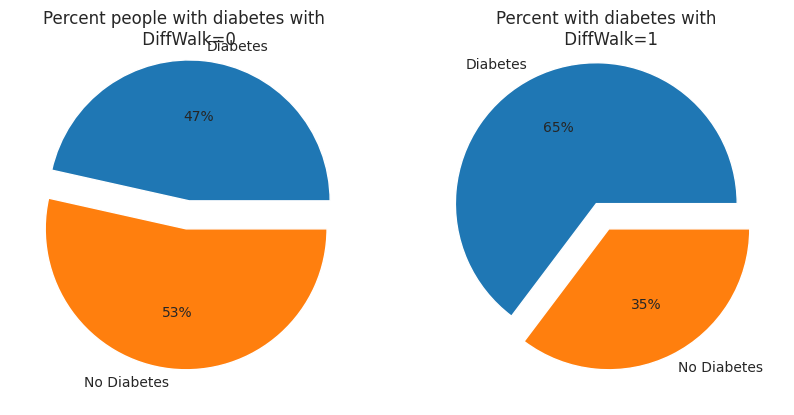

--------------------------------------------
Generic information about column Sex
--------------------------------------------


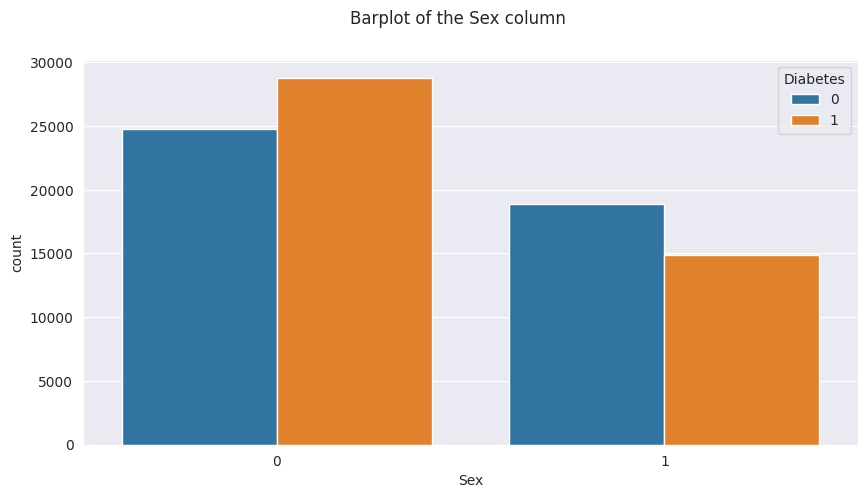

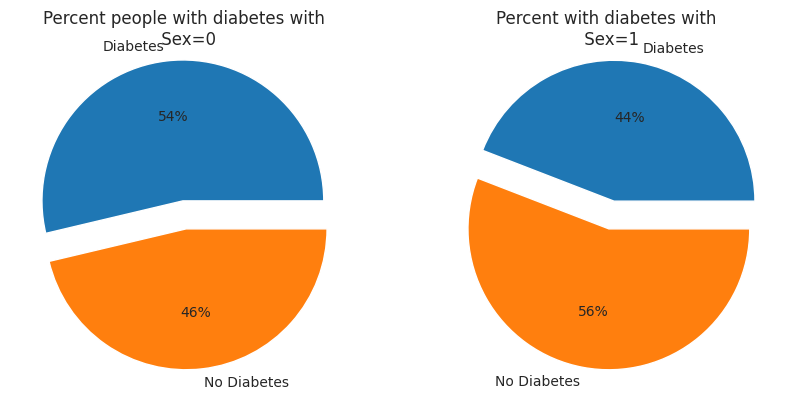

--------------------------------------------
Generic information about column Age
--------------------------------------------


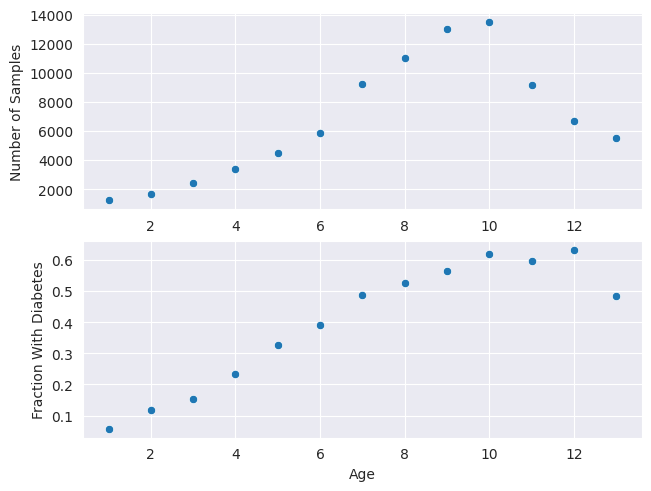

--------------------------------------------
Generic information about column Education
--------------------------------------------


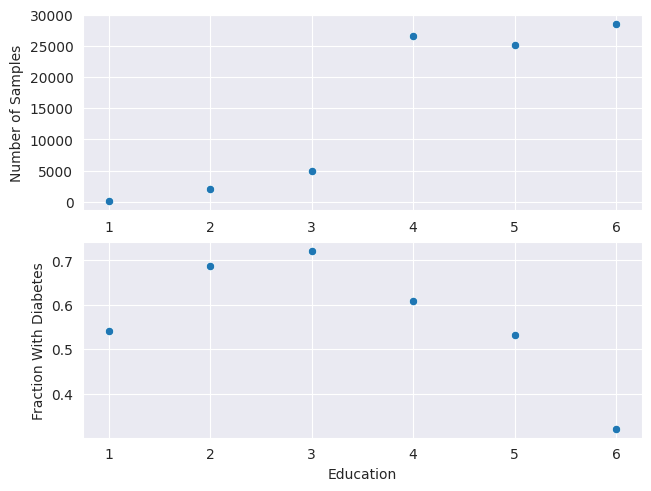

--------------------------------------------
Generic information about column Income
--------------------------------------------


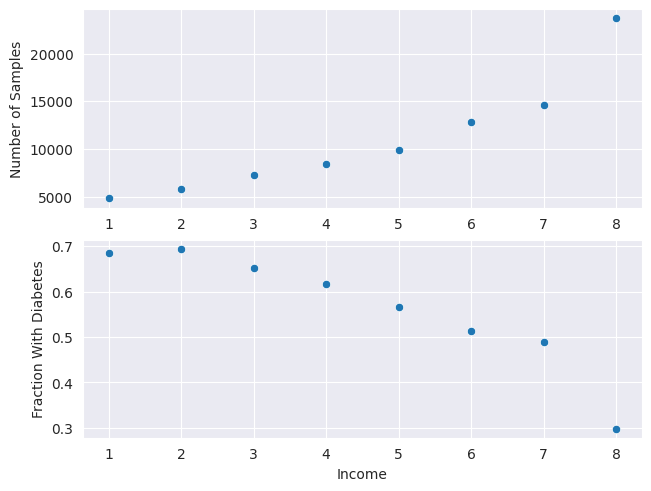

In [46]:
plot_data_summary_by_col(df_train_upsampled)